## investigating hypoxic control treatment

this treatment resulted in 3 pairwise comparisons with DMGs - interested if all of these DMGs are unique to hypoxia control (HC)

In [24]:
library(tidyverse)
library(ggvenn)
library(RColorBrewer)

In [3]:
# importing csv files

# control control vs. hypoxic control
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HC.csv')

# control hypoxic vs. hypoxic control
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CH_vs_HC.csv')

# hypoxic hypoxic vs. hypoxic control
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_HC.csv')


now want to pull out only the significant DMGs for all 3 dfs (adjusted p-value < 0.05)

In [9]:
# control control vs. hypoxic control
sig_CC_HC <- filter(CC_HC, CC_HC$padj < 0.05)
dim(sig_CC_HC) # 20 total sig DMGs

# control hypoxic vs. hypoxic control
sig_CH_HC <- filter(CH_HC, CH_HC$padj < 0.05)
dim(sig_CH_HC) # 258 total sig DMGs

# hypoxic hypoxic vs. hypoxic control
sig_HH_HC <- filter(HH_HC, HH_HC$padj < 0.05)
dim(sig_HH_HC) # 124 total sig DMGs

[1] 20  7

[1] 258   7

[1] 124   7

assigning direction for which treatment had sig more differentially methylated genes

In [14]:
# control control vs. hypoxic control
sig_CC_HC$more_me_in <- ifelse(sig_CC_HC$log2FoldChange<0 & sig_CC_HC$padj < 0.05, "CC", 
                        ifelse(sig_CC_HC$log2FoldChange>0 & sig_CC_HC$padj < 0.05, "HC",
                               "not significant"))

sig_CC_HC$pair <- 'CC_HC'

head(sig_CC_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,more_me_in,pair
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111133260,29.447088,-1.416453,0.2784943,-4.188429,2.808925e-05,0.019080261,CC,CC_HC
2,LOC111113022,22.965391,-1.528308,0.3144857,-4.064756,4.808269e-05,0.025712231,CC,CC_HC
3,LOC111126993,25.822589,-1.282972,0.2564881,-4.027369,5.640438e-05,0.028096900,CC,CC_HC
4,LOC111129122,6.526204,1.893684,0.3585291,4.584520,4.550300e-06,0.008499960,HC,CC_HC
5,LOC111119327,13.288669,-1.558224,0.3076599,-4.252177,2.117020e-05,0.015818372,CC,CC_HC
6,LOC111123492,43.857546,-1.295889,0.2139553,-4.888353,1.016832e-06,0.003798884,CC,CC_HC


In [15]:
# control hypoxic vs. hypoxic control
sig_CH_HC$more_me_in <- ifelse(sig_CH_HC$log2FoldChange<0 & sig_CH_HC$padj < 0.05, "CH", 
                        ifelse(sig_CH_HC$log2FoldChange>0 & sig_CH_HC$padj < 0.05, "HC",
                               "not significant"))

sig_CH_HC$pair <- 'CH_HC'

head(sig_CH_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,more_me_in,pair
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111133260,29.44709,-2.057784,0.2714630,-6.659411,2.749265e-11,1.130002e-07,CH,CH_HC
2,LOC111136882,30.36485,-1.353845,0.3007495,-3.670312,2.422543e-04,1.347212e-02,CH,CH_HC
3,LOC111132155,15.63095,-1.656631,0.2970751,-4.734932,2.191289e-06,4.348214e-04,CH,CH_HC
4,LOC111099029,22.80687,-1.312153,0.2971206,-3.574821,3.504671e-04,1.783363e-02,CH,CH_HC
5,LOC111113022,22.96539,-1.830589,0.3119173,-5.067332,4.034298e-07,1.100733e-04,CH,CH_HC
6,LOC111128838,37.09761,-1.478046,0.2785766,-4.408290,1.041900e-05,1.399512e-03,CH,CH_HC


In [16]:
# control control vs. hypoxic control
sig_HH_HC$more_me_in <- ifelse(sig_HH_HC$log2FoldChange<0 & sig_HH_HC$padj < 0.05, "HC", 
                        ifelse(sig_HH_HC$log2FoldChange>0 & sig_HH_HC$padj < 0.05, "HH",
                               "not significant"))

sig_HH_HC$pair <- 'HH_HC'

head(sig_HH_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,more_me_in,pair
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111133260,29.447088,1.585734,0.2666112,5.010045,5.441729e-07,0.0002034527,HH,HH_HC
2,LOC111109809,2.627327,1.780740,0.3607403,4.243331,2.202262e-05,0.0038746861,HH,HH_HC
3,LOC111104153,15.573645,1.370795,0.2902406,3.861606,1.126439e-04,0.0142359681,HH,HH_HC
4,LOC111128314,19.698158,1.338910,0.2927081,3.720122,1.991265e-04,0.0203041148,HH,HH_HC
5,LOC111128868,4.355699,-1.521072,0.3616331,-3.514811,4.400668e-04,0.0362267828,HC,HH_HC
6,LOC111128838,37.097609,1.605668,0.2712016,4.998745,5.770459e-07,0.0002049475,HH,HH_HC


Now curious how many of the genes that are DMGs for hypoxic control (HC) are the same/if there's any overlap

In [20]:
HC1 <- filter(sig_CC_HC, sig_CC_HC$more_me_in == 'HC')
HC2 <- filter(sig_CH_HC, sig_CH_HC$more_me_in == 'HC')
HC3 <- filter(sig_HH_HC, sig_HH_HC$more_me_in == 'HC')

HC_df <- rbind(HC1, HC2, HC3)
dim(HC_df)
length(unique(HC_df$X))

[1] 120   9

[1] 107

Venn diagram - only looking at genes that were signficantly differentially methylated for HC (hypoxic control) in the three pairwise comparisons

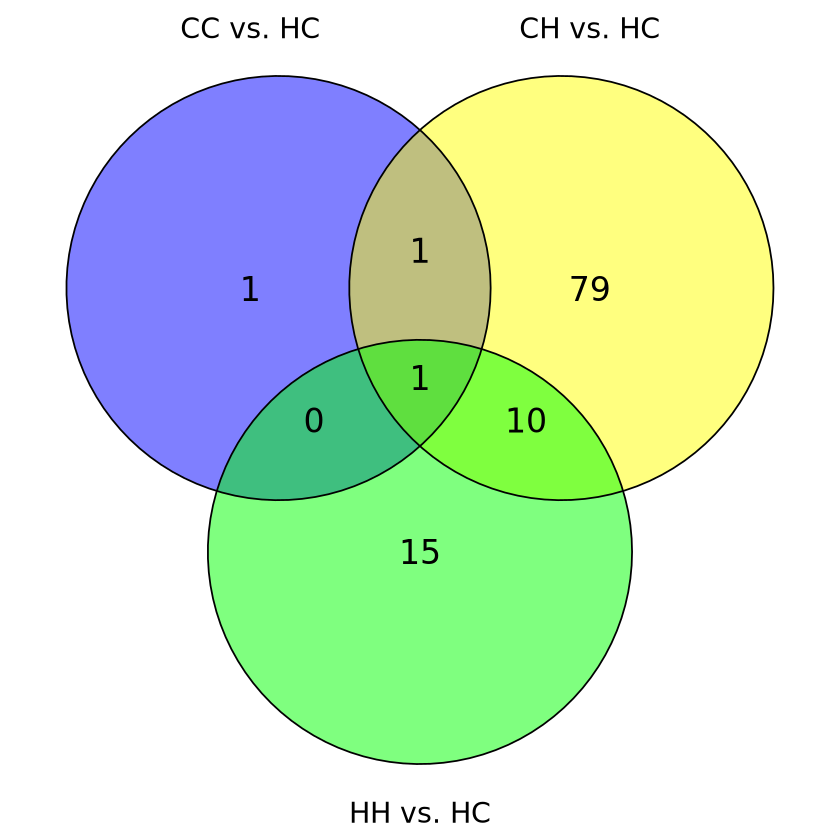

In [26]:
x = list(A = HC1$X,
         B = HC2$X, 
         C = HC3$X)

names(x) <- c('CC vs. HC',
              'CH vs. HC',
              'HH vs. HC')

ggvenn(x,
      set_name_size = 6,
       text_size = 7,
      stroke_size = 0.5, 
       show_percentage = FALSE)

so there's one gene that is significantly differentially methylated in all three pairwise comparisons for HC...

In [28]:
# Merge the data frames on the 'gene' column
merged_df <- Reduce(function(x, y) merge(x, y, by = "X"), list(HC1, HC2, HC3))

# View the result
print(as.data.frame(merged_df))


             X baseMean.x log2FoldChange.x   lfcSE.x   stat.x     pvalue.x
1 LOC111129146   17.02599         1.395451 0.2641511 4.336347 1.448705e-05
     padj.x more_me_in.x pair.x baseMean.y log2FoldChange.y   lfcSE.y   stat.y
1 0.0135309           HC  CC_HC   17.02599         1.434632 0.2622414 4.517333
      pvalue.y       padj.y more_me_in.y pair.y baseMean log2FoldChange
1 6.262334e-06 0.0009592357           HC  CH_HC 17.02599      -1.568892
      lfcSE      stat       pvalue         padj more_me_in  pair
1 0.2488735 -5.299448 1.161536e-07 8.019556e-05         HC HH_HC


the shared gene is LOC111129146 ([NCBI link](https://www.ncbi.nlm.nih.gov/gene/111129146))
- involved in the negative regulation of canonical Wnt signaling pathway
- ends with a change in transcription of target genes ([AmiGO link](https://amigo.geneontology.org/amigo/term/GO:0090090))